In [1]:
import pandas

In [2]:
df=pandas.read_csv("scmp2017.csv")

In [3]:
dfc=df["datetime"]=="2017-07-01"
df0701=df[dfc]
df0701

,Unnamed: 0,title,byline,dates,datetime
7313,7489,Sino-British Joint Declaration on Hong Kong 'n...,NaN,01 July 2017,2017-07-01
7314,7490,Hong Kong to be staging point for plan to draw...,NaN,01 July 2017,2017-07-01
7315,7491,Chinese slang and famous Canto-pop song featur...,NaN,01 July 2017,2017-07-01
7316,7492,All smiles,NaN,01 July 2017,2017-07-01
7317,7495,Frustration for protesters trying to catch Xi'...,NaN,01 July 2017,2017-07-01
7318,7494,President Xi Jinping tours Hong Kong junior po...,NaN,01 July 2017,2017-07-01
7319,7496,Two pan-democrats pass protest letters to Beij...,NaN,01 July 2017,2017-07-01
7320,7488,patriotic notes,NaN,01 July 2017,2017-07-01
7321,7493,Chinese first lady Peng Liyuan trades 'punches...,NaN,01 July 2017,2017-07-01
7322,7487,"'Hello, chairman': Hong Kong PLA troops break ...",NaN,01 July 2017,2017-07-01


In [4]:
titlelist=df0701["title"].tolist()
titlelist

["Sino-British Joint Declaration on Hong Kong 'no longer has any realistic meaning', says Chinese Foreign Ministry",
 "Hong Kong to be staging point for plan to draw 100 billion yuan of capital into China's bond market: Foreign investors given access to the mainland's US$9.3 trillion fixed-income issues from Monday with Hong Kong serving as the staging point",
 "Chinese slang and famous Canto-pop song feature in Xi Jinping's speech at Hong Kong banquet: Xi bucks the leadership reputation for solemnity at banquet by using a phrase popular with social media users and citing a 1980s Alan Tam song about a better future for the city",
 'All smiles',
 "Frustration for protesters trying to catch Xi's eye",
 'President Xi Jinping tours Hong Kong junior police training camp: Xi Jinping visits Junior Police Call members at their camp in Pat Heung, telling them to eat well, grow up fast and serve the country',
 'Two pan-democrats pass protest letters to Beijing official',
 'patriotic notes',
 "Ch

In [5]:
f = open('20170701scmp.txt','w')
for i in range(len(titlelist)):
    f.write(titlelist[i])
f.close()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt                          
from PIL import Image
from scipy.misc import imread 
import numpy as np 
import seaborn as sns
import jieba
import wordcloud
from pylab import mpl 
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
import imageio
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords 

def getText(txt):
    text=open(txt,"r").read() 
    text=text.lower()                 
    for ch in '`!@#~$%^&*()_+-=*/{}[];,./?<>':
        text=text.replace(ch," ")  
    return text

def remove_stopwords(words):
    processed_word_list = []
    for word in words:
        word = word.lower() # in case they arenet all lower cased
        if word not in stopwords:
            processed_word_list.append(word)
    return processed_word_list

In [7]:
def word_count(processed_word_list):
    word_count = pandas.Series(processed_word_list).value_counts().sort_values(ascending=False)[0:20]  
    fig = plt.figure(figsize=(16,8))  
    x = word_count.index.tolist()  
    y = word_count.values.tolist()  
    sns.barplot(x, y, palette="BuPu_r")  
    plt.title('SCMP Top20')  
    plt.ylabel('count')  
    sns.despine(bottom=True)  
    #plt.savefig('/Users/xuyucan/SCMP词频统计.png',dpi=400)  
    plt.show() 

In [8]:
def tag_cloud(text):
    image = Image.open(r'./picture.jpg')
    graph = np.array(image)
    wc = WordCloud(mode='RGBA',background_color='white',max_words=2000,stopwords=stopwords,max_font_size=300,random_state=42,mask=graph)
    wc.generate(' '.join(text))
    img = imageio.imread(r"\users\xuwen\venv\test\ppp.jpg") 
    cloud_colors = wordcloud.ImageColorGenerator(np.array(img))
    cloud_colors.default_color = [0.6,0.6,0.6]
    wc.recolor(color_func=cloud_colors)
    #wc.to_file(r"/Users/xuyucan/SCMP_tagcloud.png") 
    plt.figure(figsize=(12,12))
    plt.imshow(wc.recolor(color_func=cloud_colors), interpolation='bilinear')
    plt.axis("off")
    plt.title('SCMP20170701', loc='Center', fontsize=20)
    plt.show()
    return plt.show()

In [21]:
stopwords = stopwordslist('./stopwords.txt')
stopwords
newstopwords = ['will','with',"in","china","kong","''china's","world","china's","amid","Chinese","china's","hongkong","says","say","hong","kong","kong's"]
stopwords.extend(newstopwords)
stopwords

['!!',
 '?!',
 '??',
 '!?',
 '`',
 '``',
 "''",
 '-lrb-',
 '-rrb-',
 '-lsb-',
 '-rsb-',
 ',',
 '.',
 ':',
 ';',
 '"',
 "'",
 '?',
 '<',
 '>',
 '{',
 '}',
 '[',
 ']',
 '+',
 '-',
 '(',
 ')',
 '&',
 '%',
 '$',
 '@',
 '!',
 '^',
 '#',
 '*',
 '..',
 '...',
 "'ll",
 "'s",
 "'m",
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 

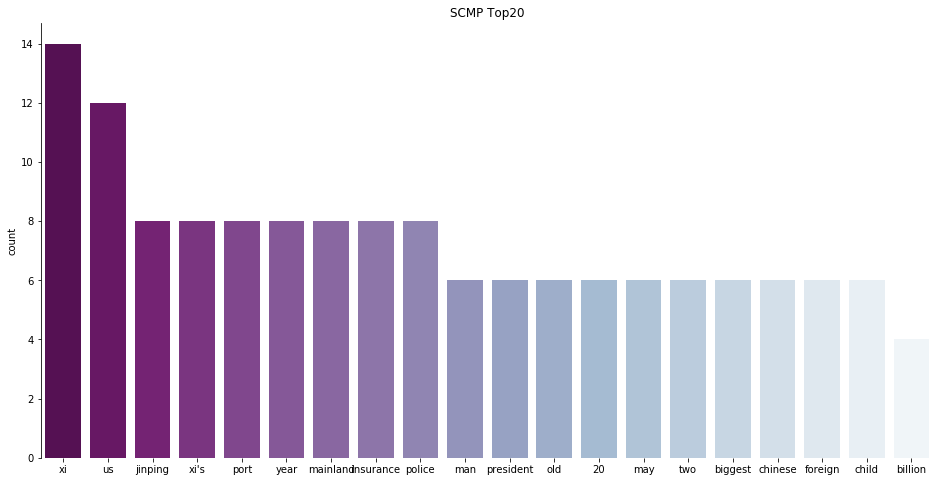

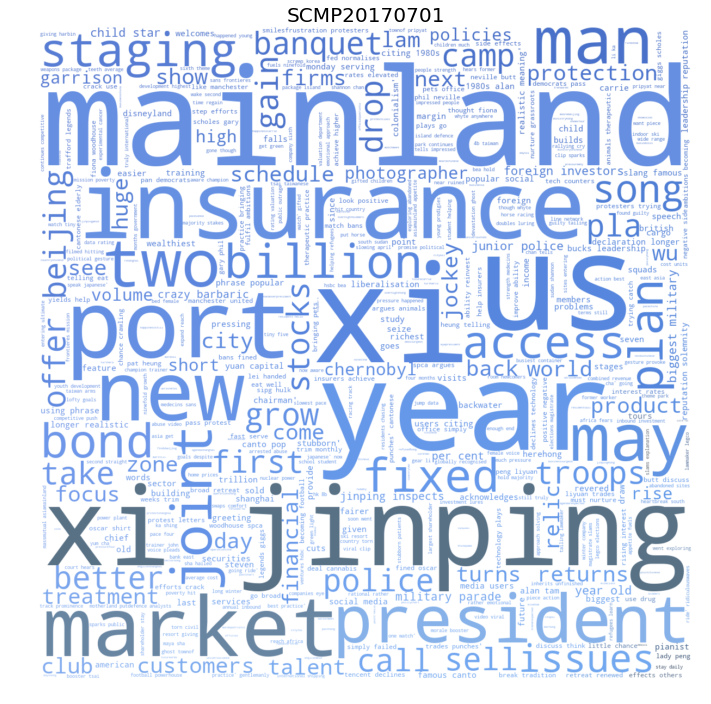

In [22]:
test=getText('./20170701scmp.txt')  
words=test.split()
processed_word_list = remove_stopwords(words)
word_count(processed_word_list)
tag_cloud(processed_word_list)